# 음악 가사 번역과 관련 삽화 자동 생성을 위한 기계번역-이미지생성 멀티모달
## 이미지 생성을 원하는 텍스트를 입력해주세요!

EX) 하늘에서 바라본 우주 , 비행기에서 바라본 하늘, 따듯한 가을 





In [20]:
prompt = input()

웹툰 스타일의 사랑스러운 고양이


**************************************************
threetech 팀 부스에 방문해 주셔서 감사합니다!
**************************************************
입력 프롬프트 : 웹툰 스타일의 사랑스러운 고양이 
번역된 프롬프트 : The cute kitten in the Webtoon style 
**************************************************
이미지를 생성 중입니다...
잠시만 기다려주세요...



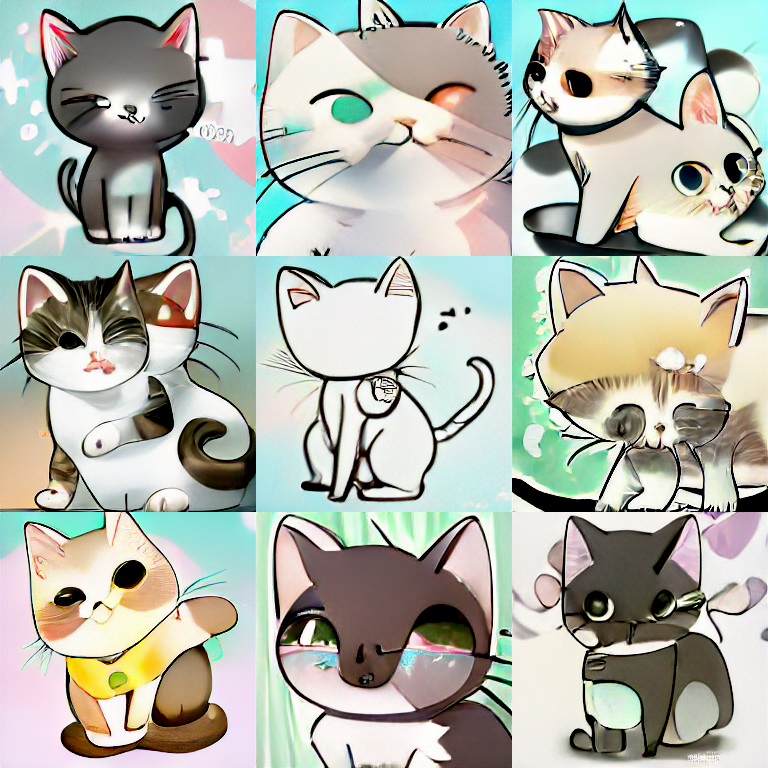

In [21]:
generate_image_by_kr(prompt)

# Import model

In [1]:
! pip install min-dalle
! pip install transformers
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for min-dalle: filename=min_dalle-0.4.11-py3-none-any.whl size=10538 sha256=4eaef675f2c65d094dce66a6837c24d4ba9b6438c4de4cf313f6587e1868a4c9
  Stored in directory: /root/.cache/pip/wheels/99/d0/db/383b84feca47e4955772284462d825f1a9557661057658ca80
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=b274917e064cf1be097b5767d27e479771e8da808cb287fe1d21cc90b863910e
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built min-dalle emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.1 MB/s eta 0:00:00
     

In [2]:
from transformers import AutoTokenizer,AutoModelForSeq2SeqLM
from transformers import pipeline
from min_dalle import MinDalle
import torch

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
model_checkpoint = "/content/gdrive/MyDrive/3tech-mt-ko-en"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
text2text_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
translationxx_to_yy = pipeline("translation_xx_to_yy", model=text2text_model, tokenizer=tokenizer)

text2image_model = MinDalle(
    models_root='./3tech-image-generator',
    dtype=torch.float32,
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


In [5]:
def generate_image_by_kr(prompt):
  print("*" * 50)
  print("threetech 팀 부스에 방문해 주셔서 감사합니다!")
  print("*" * 50)
  print(f"입력 프롬프트 : {prompt} ")
  prompt = translationxx_to_yy(prompt)[0]['translation_text']
  print(f"번역된 프롬프트 : {prompt} ")
  print("*" * 50)
  print(f"이미지를 생성 중입니다...")
  print(f"잠시만 기다려주세요...")
  print("")
  image = text2image_model.generate_image(
    text=prompt,
    seed=-1,
    grid_size=3,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=32,
    is_verbose=False
  )

  display(image)
  